In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np 
from utilities import *

In [2]:
news = pd.read_csv('Datasets/sp500_news.csv')
news.describe()

,Unnamed: 0,Open,Close,Volume,Positive,Negative,Neutral,Price_change
count,21575.000000,21575.000000,21575.000000,2.157500e+04,21575.000000,21575.000000,21575.000000,21575.000000
mean,10787.000000,78.296328,78.331562,4.730941e+07,0.271439,0.179203,0.549358,0.050290
std,6228.310365,63.767364,63.805050,1.524734e+08,0.270679,0.249286,0.304594,0.998758
min,0.000000,0.050000,0.050000,0.000000e+00,0.006671,0.005900,0.009800,-1.000000
25%,5393.500000,33.720688,33.740002,4.989100e+06,0.053305,0.020098,0.306682,-1.000000
50%,10787.000000,61.060001,61.070000,9.285804e+06,0.160588,0.049375,0.569549,1.000000
75%,16180.500000,105.180000,105.365002,2.042660e+07,0.425794,0.249680,0.857247,1.000000
max,21574.000000,391.000000,397.779999,3.692928e+09,0.959081,0.975977,0.954945,1.000000


In [3]:
dates = news.date.unique()
news

,Unnamed: 0,date,stock,Open,Close,Volume,Positive,Negative,Neutral,Price_change
0,0,2020-03-09,AAPL,65.937500,66.542503,286744800,0.046127,0.411464,0.542409,-1
1,1,2020-03-10,AAPL,69.285004,71.334999,285290000,0.070845,0.449025,0.480130,1
2,2,2020-03-11,AAPL,69.347504,68.857498,255598800,0.190995,0.453761,0.355244,-1
3,3,2020-03-12,AAPL,63.985001,62.057499,418474000,0.204221,0.447518,0.348261,-1
4,4,2020-03-13,AAPL,66.222504,69.492500,370732000,0.315863,0.218127,0.466010,1
...,...,...,...,...,...,...,...,...,...,...
21570,21570,2020-05-28,NEE,61.099998,62.840000,12416000,0.093133,0.009149,0.897718,1
21571,21571,2020-06-02,NEE,63.892502,64.150002,10640000,0.115795,0.010105,0.874100,1
21572,21572,2020-06-04,NEE,64.415001,62.972500,12012400,0.091629,0.172144,0.736227,-1
21573,21573,2020-06-05,NEE,63.044998,63.595001,12370800,0.751321,0.024052,0.224628,1


Dataset contains :
 11330 (10245.00%) number of price increace examples 
 52.514484356894556  (47.49%) number of price decrease examples. 
 1.11  increase to decrease examples ratio


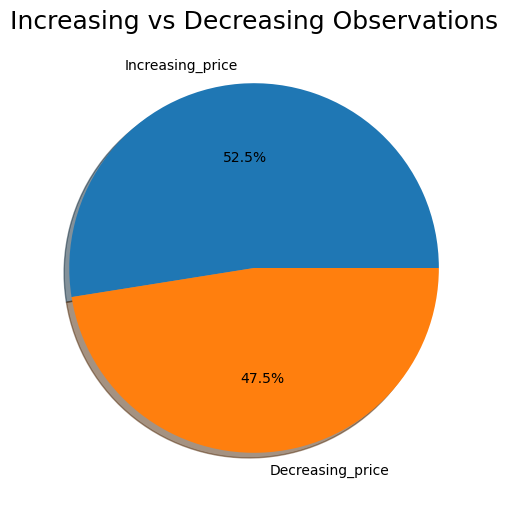

In [4]:
big_df = news 
incr = len(big_df[big_df['Price_change']==1])
decr = big_df.shape[0] - incr
incr_ratio = (100 * incr) / big_df.shape[0]
decr_ratio = (100 * decr) / big_df.shape[0]
incr_to_decr = (incr/decr)

print('Dataset contains :\n \
{} ({:.2f}%) number of price increace examples \n \
{}  ({:.2f}%) number of price decrease examples. \n \
{:.2f}  increase to decrease examples ratio'\
.format(incr, decr, incr_ratio, decr_ratio, incr_to_decr))

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(x=[incr, decr], labels=['Increasing_price','Decreasing_price'], shadow=True, autopct='%1.1f%%')
plt.title('Increasing vs Decreasing Observations', fontsize=18)
plt.show()

In [5]:
print(len(dates))
np.sort(dates)

2617


array(['2010-01-05', '2010-01-06', '2010-01-07', ..., '2020-06-09',
       '2020-06-10', '2020-06-11'], dtype=object)

#### Group news dataframe by date , ignore company name.

In [6]:
sent_df = news.groupby(by = 'date').mean()


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
sent_df = sent_df.drop(['Unnamed: 0', 'Open', 'Close', 'Price_change'], axis=1)
sent_df

In [34]:
sp500 =  financial_dataset("^GSPC",2, start_date="2010-01-01",end_date= "2020-6-12")
sp500

[*********************100%***********************]  1 of 1 completed
^GSPC financial dataframe dimensions  (2629, 6)
Positive changes : 1441
Negative changes : 1188
No changes : 0


,Open,Close,Volume,Price_change,date
Date,,,,,
2009-12-31,1126.599976,1115.099976,2076990000,1,0
2010-01-04,1116.560059,1132.989990,3991400000,1,2010-01-04
2010-01-05,1132.660034,1136.520020,2491020000,1,2010-01-05
2010-01-06,1135.709961,1137.140015,4972660000,1,2010-01-06
2010-01-07,1136.270020,1141.689941,5270680000,1,2010-01-07
...,...,...,...,...,...
2020-06-05,3163.840088,3193.929932,8617590000,1,2020-06-05
2020-06-08,3199.919922,3232.389893,8437380000,1,2020-06-08
2020-06-09,3213.320068,3207.179932,6382620000,-1,2020-06-09


In [49]:
data = sp500.merge(sent_df, on='date', how='inner')
data = data.drop(['Open', 'Volume_x'], axis=1)
data = data.rename({'Volume_y':'Volume'}, axis=1)
data = data[['date','Volume', 'Close', 'Positive', 'Negative', 'Neutral', 'Price_change']]
data

,date,Volume,Close,Positive,Negative,Neutral,Price_change
0,2010-01-05,1.111477e+07,1136.520020,0.157785,0.489590,0.352625,1
1,2010-01-06,9.592200e+06,1137.140015,0.159253,0.114102,0.726645,1
2,2010-01-07,1.264640e+07,1141.689941,0.441000,0.012006,0.546994,1
3,2010-01-08,1.508503e+07,1144.979980,0.039152,0.384472,0.576376,1
4,2010-01-11,7.396000e+06,1146.979980,0.114053,0.029774,0.856173,1
...,...,...,...,...,...,...,...
2603,2020-06-05,2.503270e+07,3193.929932,0.567891,0.070503,0.361606,1
2604,2020-06-08,2.303770e+07,3232.389893,0.523481,0.124646,0.351873,1
2605,2020-06-09,2.969893e+07,3207.179932,0.296441,0.337487,0.366072,-1
2606,2020-06-10,3.795272e+07,3190.139893,0.390972,0.240399,0.368628,-1


In [50]:
data.to_csv('Datasets/sp500_sentiment_non_weighted.csv')